<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_100Hz_RandomForestClassifier_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Size_distribution_100Hz_RandomForestClassifier_SHAP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_100Hz.csv',sep=';')

In [7]:
#!pip install shap

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.ensemble import RandomForestClassifier

In [6]:
# PREPROCESSING
def preprocessing(df):
    df = df.copy()
    df = df.drop(['Label',' '],axis=1)
    df.dropna(inplace=True)
    y = df['Group']
    X = df.drop('Group',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
    return X_train, X_test, y_train, y_test,scaler
X_train, X_test, y_train, y_test,scaler = preprocessing(data)

In [8]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print('acc: ',round(model.score(X_test,y_test),4))

acc:  0.9782


In [9]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
model.classes_

array([0, 1])

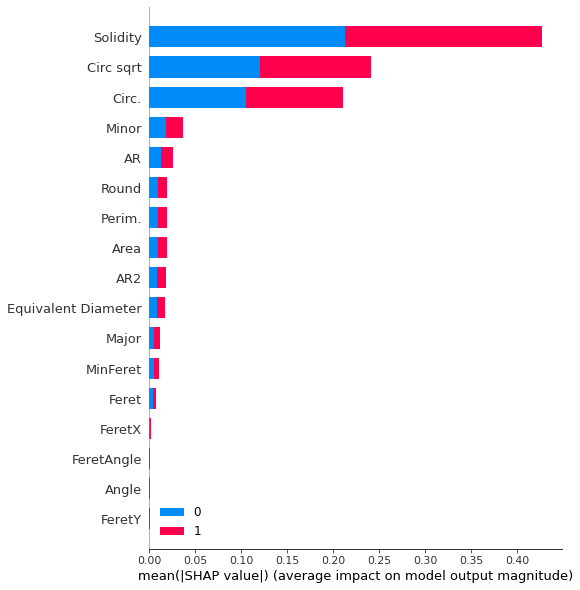

In [10]:
shap.summary_plot(shap_values,X_test,class_names=model.classes_)

In [12]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
accuracy_score(y_test,y_pred)

0.9781659388646288

In [16]:
confusion_matrix(y_test,y_pred)

array([[125,   3],
       [  2,  99]])

In [17]:
data_vis = X_test.copy()

In [18]:
data_vis=pd.DataFrame(scaler.inverse_transform(data_vis),columns=data_vis.columns)

In [19]:
data_vis['y_pred'] = y_pred

In [20]:
y_test

218     0
819     1
501     0
651     1
323     0
       ..
361     0
292     0
1131    1
558     0
448     0
Name: Group, Length: 229, dtype: int64

In [21]:
data_vis['y_test'] = y_test.values

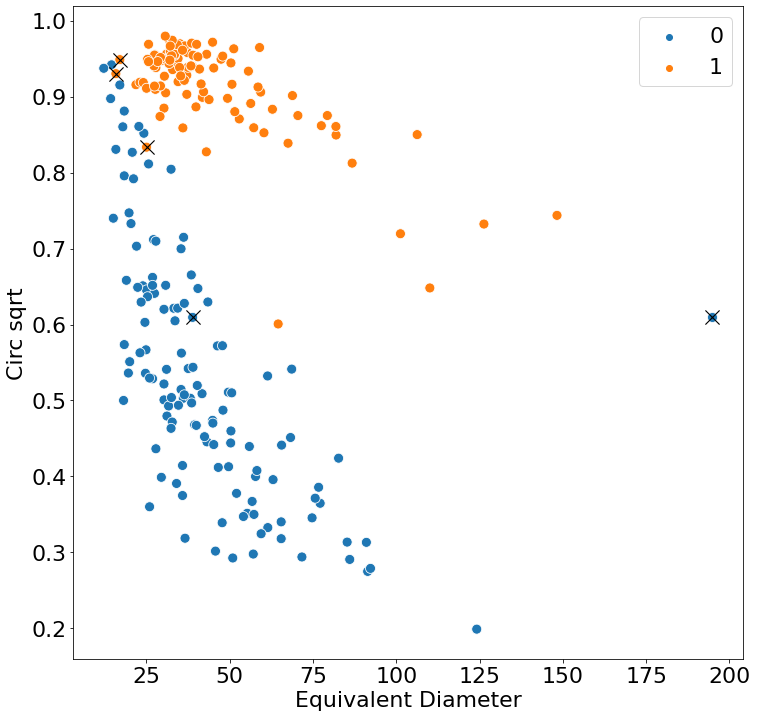

In [22]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 22})
sns.scatterplot(data=data_vis,
                y='Circ sqrt',
                x='Equivalent Diameter',
                hue='y_pred',
                s=100)
sns.scatterplot(data=data_vis[data_vis['y_pred'] != data_vis['y_test']],
                y='Circ sqrt',
                x='Equivalent Diameter',
                color='black',
                s=200,
                marker="x")